# MC-PDFT

## DFT for strong correlation

Let's start by looking at how well standard DFT performs for strong correlation. Here for simplicity, we will use the textbook example of H$_2$ dissociation. We also compute Hartree-Fock and full CI for comparison.

In [1]:
import matplotlib.pyplot as plt
import multipsi as mtp
import numpy as np
import veloxchem as vlx

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 6.


In [2]:
# HF, BLYP and CI calculation of H.
mol_str = """
H 0.0000 0.0000 0.0000
"""

molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

scf_drv = vlx.ScfUnrestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)
E_H_hf = scf_drv.get_scf_energy()

scf_drv.xcfun = "BLYP"
scf_results = scf_drv.compute(molecule, basis)
E_H_blyp = scf_drv.get_scf_energy()

space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
space.fci()
CIdrv = mtp.CIDriver()
ci_results = CIdrv.compute(molecule, basis, space)
E_H_FCI = CIdrv.get_energy()

# HF, BLYP and CI calculations of H2 dissociation

mol_template = """
H 0.0000 0.0000 -H2dist
H 0.0000 0.0000  H2dist
"""
scf_drv = vlx.ScfRestrictedDriver()
dft_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
dft_drv.ostream.mute()
dft_drv.xcfun = "BLYP"

distlist = [
    0.5,
    0.6,
    0.65,
    0.7,
    0.75,
    0.8,
    0.9,
    1,
    1.2,
    1.4,
    1.5,
    1.6,
    1.7,
    2,
    2.5,
    3,
    4,
]
E_hf = []
E_blyp = []
E_FCI = []

# Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("H2dist", str(dist / 2))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
    basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)
    scf_results = scf_drv.compute(molecule, basis)
    E_hf.append(scf_drv.get_scf_energy() - 2 * E_H_hf)

    dft_results = dft_drv.compute(molecule, basis)
    E_blyp.append(dft_drv.get_scf_energy() - 2 * E_H_blyp)

    space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
    space.fci()
    ci_results = CIdrv.compute(molecule, basis, space)
    E_FCI.append(CIdrv.get_energy() - 2 * E_H_hf)

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              5
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(1,5)

          CI expansion:
          -------------
Number of determinants:      5


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                   

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNIN

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNIN

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.126903786231    0.0000000000      0.02833405      0.00776828      0.00000000                
Intel MKL WA

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
        

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.100056242572    0.0000000000      0.02692675      0.00838888      0.00000000                
Intel MKL WA

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
        

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNIN

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.002120347046    0.0000000000      0.02044695      0.00718048      0.00000000                
Intel MKL WA

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

               Spin-Restricted Kohn-Sham:                                                                                 
               --------------------------                                                                                 
               Total Energy                       :       -1.0594021721 a.u.                                              
               Electronic Energy                  :       -1.4121869794 a.u.                                              
               Nuclear Repulsion Energy           :        0.3527848073 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000003 a.u.                                              
                                                                                                                          
                

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                  3        -0.984096789115   -0.0000000181      0.00001053      0.00000370      0.00016801                
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                  4        -0.984096789147   -0.0000000000      0.00000000      0.00000000      0.00000671                
    

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * SAD initial guess computed in 0.00 sec.                                                                          
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.981352360737 a.u. Time: 0.01 sec.                                   
            

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.966950631402    0.0000000000      0.01667634      0.00589302      0.00000000                
Intel MKL WA

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

               Spin-Restricted Kohn-Sham:                                                                                 
               --------------------------                                                                                 
               Total Energy                       :       -1.0319942880 a.u.                                              
               Electronic Energy                  :       -1.3432750003 a.u.                                              
               Nuclear Repulsion Energy           :        0.3112807123 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000006 a.u.                                              
                                                                                                                          
                

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

                  3        -0.921908594102   -0.0000000044      0.00000367      0.00000128      0.00008607                
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                  4        -0.921908594106   -0.0000000000      0.00000000      0.00000000      0.00000249                
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.01 sec.                                                         
        

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * SAD initial guess computed in 0.00 sec.                                                                          
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.920706243669 a.u. Time: 0.01 sec.                                   
            

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNIN

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

               Spin-Restricted Kohn-Sham:                                                                                 
               --------------------------                                                                                 
               Total Energy                       :       -0.9629512675 a.u.                                              
               Electronic Energy                  :       -1.1746221519 a.u.                                              
               Nuclear Repulsion Energy           :        0.2116708844 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000024 a.u.                                              
                                                                                                                          
                

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                  3        -0.826447843880   -0.0000000000      0.00000021      0.00000007      0.00000161                
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               *** SCF converged in 3 iterations. Time: 0.01 sec.                                                         
                                                                                                                          
        

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * SAD initial guess computed in 0.00 sec.                                                                          
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.826215752307 a.u. Time: 0.01 sec.                                   
            

                          Configuration Interaction Driver
                                                                                                                          

          Active space definition:
          ------------------------
Number of inactive (occupied) orbitals: 0
Number of active orbitals:              10
Number of virtual orbitals:             0

    This is a CASSCF wavefunction: CAS(2,10)

          CI expansion:
          -------------
Number of determinants:      55


        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
         Solved by explicit diagonalization
                                                                                                                          
                                                                                                                          
        CI Iterations
        -------------
                

* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNIN

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                                                                                                                          
               *** SCF converged in 5 iterations. Time: 0.26 sec.                                                         
                                                                                                                          
               Spin-Restricted Kohn-Sham:                                                                                 
               --------------------------                                                                                 
               Total Energy                       :       -0.9260012471 a.u.                                              
               Electronic Energy                  :       -1.0582955498 a.u.                                              
               Nuclear Repulsion Energy           :        0.1322943027 a.u.                                              
               -

                                                                                                                          
** Convergence reached in 1 iterations
                                                                                                                          
        Final results
        -------------
                                                                                                                          
                                                                                                                          
* State 1
- Energy: -0.9986061861413568
- S^2   : 0.00  (multiplicity = 1.0 )
- Natural orbitals
1.03178 0.96822 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000


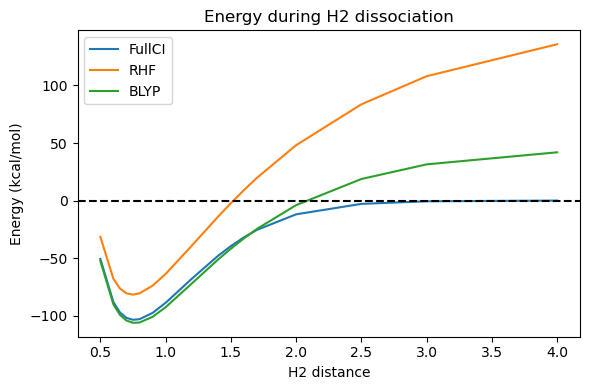

In [3]:
plt.figure(figsize=(6, 4))
plt.title("Energy during H2 dissociation")
x = np.array(distlist)
y1 = np.array(E_FCI) * 627.5
y2 = np.array(E_hf) * 627.5
y3 = np.array(E_blyp) * 627.5
plt.plot(x, y1, label="FullCI")
plt.plot(x, y2, label="RHF")
plt.plot(x, y3, label="BLYP")
plt.axhline(y=0, color="k", linestyle="--")
plt.xlabel("H2 distance")
plt.ylabel("Energy (kcal/mol)")
plt.legend()
plt.tight_layout()
plt.show()

Around the equilibrium distance, BLYP performs remarkably well. Actually, since we are only using a small DZ basis set, it is likely that the FullCI curve is too high and the true answer is closer to the BLYP curve. On the other hand, approaching dissociation, BLYP follows the same trend as Hartree-Fock and goes above the 0 which represents the energy of the 2 separate hydrogens, though with a significantly smaller error than Hartree-Fock.

One way to at least partly fix this issue is by using so-called broken symmetry. By default the DFT calculation respect the symmetry of the system as well as the spin symmetry, but you can explicitely break this symmetry by starting from a guess with one $\alpha$ electron on one hydrogen and one $\beta$ electron on the other one.

In [4]:
# Broken-symmetry BLYP calculation of H2

bs_drv = vlx.ScfUnrestrictedDriver()
bs_drv.ostream.mute()
bs_drv.xcfun = "BLYP"
bs_drv.guess_unpaired_electrons = "1(1), 2(-1)"  # alpha on atom 1 and beta on atom 2

E_bs = []

# Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("H2dist", str(dist / 2))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
    basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

    bs_results = bs_drv.compute(molecule, basis)
    E_bs.append(bs_drv.get_scf_energy() - 2 * E_H_blyp)

* Info * Reading basis set from file: /opt/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ     
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info *

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNIN

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * Ort

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               Iter. |    Kohn-Sham Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
        

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
    

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          
* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNIN

                                                                                                                          
               *** SCF converged in 11 iterations. Time: 0.50 sec.                                                        
                                                                                                                          
               Spin-Unrestricted Kohn-Sham:                                                                               
               ----------------------------                                                                               
               Total Energy                       :       -1.0594021721 a.u.                                              
               Electronic Energy                  :       -1.4121869794 a.u.                                              
               Nuclear Repulsion Energy           :        0.3527848073 a.u.                                              
               -

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
    

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Inte

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
    

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Inte

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               Iter. |    Kohn-Sham Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
    

* Info * Reading basis set from file: /opt/anaconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ      
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                                                                                                          
               Iter. |    Kohn-Sham Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.992929532533    0.0000000000      0.00106060      0.00020676      0.00000000                
Intel MK

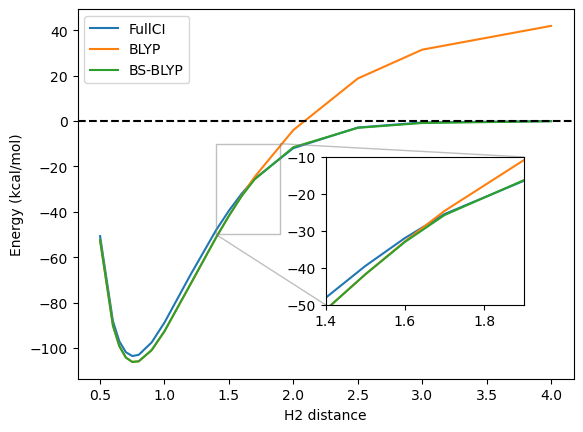

In [5]:
y4 = np.array(E_bs) * 627.5

fig, ax = plt.subplots()
ax.plot(x, y1, label="FullCI")
ax.plot(x, y3, label="BLYP")
ax.plot(x, y4, label="BS-BLYP")
ax.axhline(y=0, color="k", linestyle="--")
ax.set_xlabel("H2 distance")
ax.set_ylabel("Energy (kcal/mol)")
ax.legend()

axin = ax.inset_axes([0.5, 0.2, 0.4, 0.4])
axin.set_xlim(1.4, 1.9)
axin.set_ylim(-50, -10)
axin.plot(x, y1, label="FullCI")
axin.plot(x, y3, label="BLYP")
axin.plot(x, y4, label="BS-BLYP")
ax.indicate_inset_zoom(axin)

plt.show()

The broken-symmetry BLYP result is here a very good match to the FullCI. Looking in more details, we can see that the energt first follows exactly the one from restricted BLYP, but has a bifurcation point where the broken-symmetry solution becomes lower in energy.

While symmetry-breaking often leads to reasonable energies, it is not always ideal. First, in more complicated systems, the intermediate region may still be poorly described, but also, the resulting wavefunction may not be physical and suffers from spin-contamination. Plotting the spin-densities before and after the bifurcation point, it is easy to see that they differ significantly in nature, implying that we do not really have a smooth transition between the restricted and symmetry-breaking regime.

In [6]:
# Plotting densities along the bond axis (z)
n = 100
z = np.linspace(-4, 4, n, endpoint=True)
coords = np.zeros((n, 3))
coords[:, 2] = z

# Before the bifurcation
mol_str = """
H 0.0000 0.0000 -0.75
H 0.0000 0.0000  0.75
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

bs_tensor = bs_drv.compute(molecule, basis)

vis_drv = vlx.VisualizationDriver()
rho1_a = vis_drv.get_density(coords, molecule, basis, bs_drv.density, "alpha")
rho1_b = vis_drv.get_density(coords, molecule, basis, bs_drv.density, "beta")

# After the bifurcation
mol_str = """
H 0.0000 0.0000 -0.85
H 0.0000 0.0000  0.85
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

bs_tensor = bs_drv.compute(molecule, basis)

vis_drv = vlx.VisualizationDriver()
rho2_a = vis_drv.get_density(coords, molecule, basis, bs_drv.density, "alpha")
rho2_b = vis_drv.get_density(coords, molecule, basis, bs_drv.density, "beta")

* Info * Reading basis set from file: /opt/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/CC-PVDZ     
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: CC-PVDZ                                                                             
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

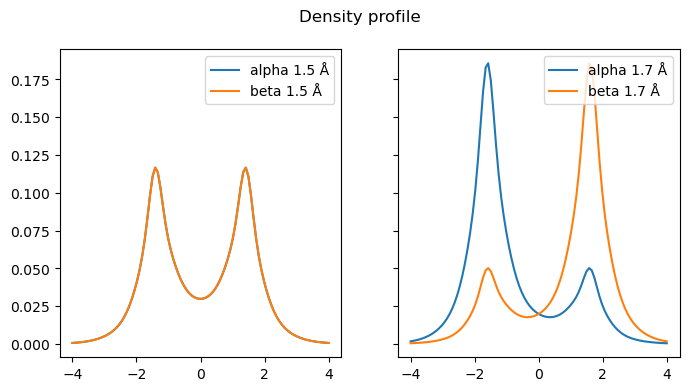

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
fig.suptitle("Density profile")
ax1.plot(z, rho1_a, label="alpha 1.5 Å")
ax1.plot(z, rho1_b, label="beta 1.5 Å")
ax2.plot(z, rho2_a, label="alpha 1.7 Å")
ax2.plot(z, rho2_b, label="beta 1.7 Å")
ax1.legend()
ax2.legend()
plt.show()

Passing the bifurcation point, we suddenly go from equal spin densities on each side to mostly $\alpha$ on the left and $\beta$ on the right.

There is thus still a need to develop a DFT framework that can properly handle strong correlation.

## Pair-density functional theory

It is interesting to note that the issue with strong correlation is only present because we use spin-densities. If we were using only the total density (which is what the fundamental theorems of DFT suggest), then H$_2$ would dissociate to the correct limit even with restricted DFT, and this would be true for any (reasonable) functional. The issue at dissociation is because the restricted wavefunction is not spin-polarized while the open-shell fragments are, and thus they have different energies.

However, the reason most modern DFT uses spin-densities is because it usually gives better results, and in particular, it can distinguish between a triplet and open-shell singlet while these two states tend to have very similar densities.

Still, in the absence of magnetic field (or relativistic effect), it is actually unphysical to spin-polarize, since space is isotropic. This has led to attempts to find another variable that is more physical that the spin-densities but carries more information that just the total density.

The on-top pair-density $\Pi(r)$ has been the most promising idea. This quantity is simply the pair-density $\rho_2(r_1,r_2)$ but for $r_1 = r_2 = r$. In other words, it represents the probability of having two-electrons in the same point in space ("on-top" of each other, hence the name).

$$\Pi(r) = \rho_2(r,r)$$

Let's see how this variable behaves in H2 at short and long distance for a simple MCSCF wavefunction.

In [8]:
# Function to compute the on-top pair-density
def get_ontop(coords, molecule, basis, space, TwoDM):
    vis_drv = vlx.VisualizationDriver()
    orbital_values = []
    for i in space.active_orbitals:
        values = np.array(
            vis_drv.get_mo(
                coords, molecule, basis, space.molecular_orbitals, i, "alpha"
            )
        )
        orbital_values.append(values)

    den_i = vlx.AODensityMatrix([space._get_inactive_density()], vlx.denmat.rest)
    rho_i = np.array(vis_drv.get_density(coords, molecule, basis, den_i, "alpha"))

    norb = space.n_active
    ontop = 2 * rho_i**2
    for i in range(norb):
        for j in range(norb):
            for k in range(norb):
                for l in range(norb):
                    ontop += (
                        TwoDM[i, j, k, l]
                        * orbital_values[i]
                        * orbital_values[j]
                        * orbital_values[k]
                        * orbital_values[l]
                    )

    return ontop

In [9]:
mol_str = """
H 0.0000 0.0000 -0.4
H 0.0000 0.0000  0.4
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

bs_tensor = bs_drv.compute(molecule, basis)
space = mtp.OrbSpace(molecule, bs_drv.mol_orbs)
space.cas(2, 2)
mcscf_drv = mtp.McscfDriver()
mcscf_drv.compute(molecule, basis, space)

den = vlx.AODensityMatrix([mcscf_drv.get_total_density()], vlx.denmat.rest)
rho1 = np.array(vis_drv.get_density(coords, molecule, basis, den, "alpha"))
ontop1 = get_ontop(
    coords, molecule, basis, space, mcscf_drv.ci_driver.get_active_2body_density(0)
)

mol_str = """
H 0.0000 0.0000 -1.0
H 0.0000 0.0000  1.0
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

bs_tensor = bs_drv.compute(molecule, basis)
space = mtp.OrbSpace(molecule, bs_drv.mol_orbs)
space.cas(2, 2)
mcscf_drv = mtp.McscfDriver()
mcscf_drv.compute(molecule, basis, space)

den = vlx.AODensityMatrix([mcscf_drv.get_total_density()], vlx.denmat.rest)
rho2 = np.array(vis_drv.get_density(coords, molecule, basis, den, "alpha"))
ontop2 = get_ontop(
    coords, molecule, basis, space, mcscf_drv.ci_driver.get_active_2body_density(0)
)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          
        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
          State-specific calculation
          Max. iterations         : 50
          BFGS window             : 5
          Convergence thresholds:
            - Energy change       : 1e-08
            - Gradient norm       : 0.0001
                                                                                                                          
          Integrals in memory
                                                                                                                          

          Active space def

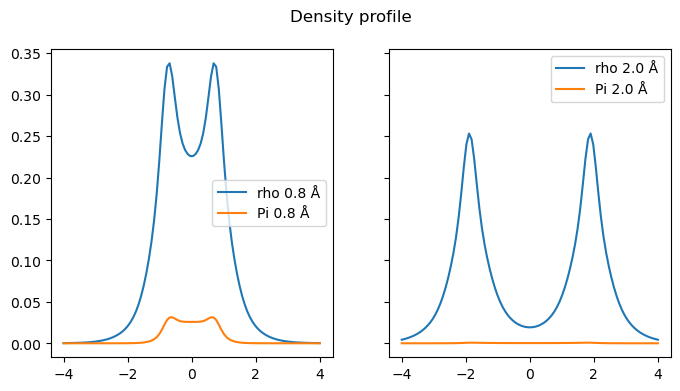

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
fig.suptitle("Density profile")
ax1.plot(z, rho1, label="rho 0.8 Å")
ax1.plot(z, ontop1, label="Pi 0.8 Å")
ax2.plot(z, rho2, label="rho 2.0 Å")
ax2.plot(z, ontop2, label="Pi 2.0 Å")
ax1.legend()
ax2.legend()
plt.show()

Close to the equilibrium, there is a significant on-top pair-density in the middle of the bond, reflecting the fact that both electrons are likely to be there simultaneously. On the other hand, in the outside of the molecule, there is still a significant density but a low on-top pair-density. This means that in these regions, there is a high likelihood of having an electron but not both simultaneously: correlation pushes the electrons to rather be on opposite side of the molecule.

Towards bond dissociation, the on-top pair-density is very small, reflecting the fact that at this point, the electrons are almost completely on opposite sides with little overlap.

Unlike the spin densities, the on-top pair-density is well defined and in particular, the on-top pair-density of two fragments at infinite distance is the same as the on-top pair-density for each fragment computed separately. So bond dissociation, and strong correlation in general, are not an issue for functionals of this variable.

But in addition, what makes this variable very promising is that for a single determinant:

$$ \Pi(r) = 2\rho_\alpha(r) \rho_\beta(r)$$

This can be easily understood if we look at the totally uncorrelated case, the Hartree Product, for which the pair-density is equal to the product of one-electron densities:

\begin{align}
 \Pi^\mathrm{Hartree}(r) &= \rho^\mathrm{Hartree}_2(r,r)\\
 &= \rho^2(r) \\
 &=\left(\rho_\alpha(r) + \rho_\beta(r)\right)^2\\
 &= \rho_\alpha^2(r) + \rho_\beta^2(r) + 2\rho_\alpha(r) \rho_\beta(r)
\end{align}

The first two terms correspond to the probability of having two electrons of same spin in the same point in space, which is non-zero in an uncorrelated Hartree product but 0 in a Slater Determinant, hence the above equation.

With this equation as well as $\rho = \rho_\alpha +  \rho_\beta$, we have two equations linking two pairs of variable, and thus, there is as much information in the density and on-top pair-density as there is in the spin-densities. In other words, you can *translate* any functional of the spin-densities to become a functional of the density and on-top pair-density in a way that they give exactly the same result for a single determinant.

A way to do this in practice is to invert the system of equations. This gives us a quadratic equation which has two solutions:

$$\rho^\mathrm{eff}_{\alpha/\beta} = 0.5 \left(\rho \pm \sqrt{\rho^2 - 2\Pi} \right)$$

We arbitrarily choose the $\alpha$ to be the larger of the two solution. Let's plot these effective spin-densities. Note that the quantity under the radical can be negative, and for now we just remove this problem by setting these cases to 0.

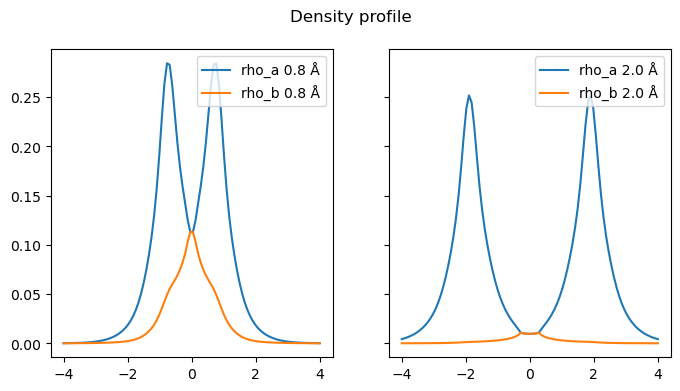

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
fig.suptitle("Density profile")
ax1.plot(
    z, 0.5 * (rho1 + np.sqrt(np.maximum(rho1**2 - 2 * ontop1, 0))), label="rho_a 0.8 Å"
)
ax1.plot(
    z, 0.5 * (rho1 - np.sqrt(np.maximum(rho1**2 - 2 * ontop1, 0))), label="rho_b 0.8 Å"
)
ax2.plot(
    z, 0.5 * (rho2 + np.sqrt(np.maximum(rho2**2 - 2 * ontop2, 0))), label="rho_a 2.0 Å"
)
ax2.plot(
    z, 0.5 * (rho2 - np.sqrt(np.maximum(rho2**2 - 2 * ontop2, 0))), label="rho_b 2.0 Å"
)
ax1.legend()
ax2.legend()
plt.show()

This result appears weird at first, because the $\alpha$ density we obtain is clearly larger than the $\beta$, which we do not expect in a singlet. Here it is important to remember that these are only "effective" densities which correspond to the physical spin densities only in a single determinant. In addition, we arbitrarily chose the larger one to be the $\alpha$, and you could easily imagine that on the right-side we could choose the reverse and the result would then look more like the broken-symmetry result.

Looking more in details, we see that this predict an approximately equal amount of $\alpha$ and $\beta$ density in the middle of the bond, corresponding to our observation above that this is where the probability of having both electrons simultaneously is the largest. By contrast, in the outer regions, the $\alpha$ density becomes very large compared to the $\beta$, which is reminescent of the broken-symmetry solution we found earlier, reflecting the correlation effects in this region. However, unlike the broken-symmetry solution, this distribution retains the left-right symmetry of the system.

Let us briefly come back to the problem of negative number under the radical. The on-top pair-density is bounded $0<\Pi(r)<\rho^2(r)$ and for a closed-shell single determinant case, $\Pi = 2\rho_\alpha \rho_\beta = 0.5 \rho^2$. This means the quantity under the radical is positive if the probability of finding two electrons in the same space is lower than that of a closed-shell single determinant, which is often the case since correlation tends to reduce this probability. But it may not always be so, locally, and in particularly in the middle of the bond here, where it would give a complex number. This is however not a problem in practice, as if we simply blindly apply the usual density functional expressions on a complex density, we get an increased energy, which is what we would expect from having a high probability of two electrons in the same place.

## Multiconfigurational pair-density functional theory

The section above tried to motivate why the density and on-top pair-density are good variables to use within a functional, becoming thus a pair-density functional. The issue of course is that we do not know the on-top pair-density, and if we compute it from the spin-densities in a Hartree-Fock or DFT calculation, we have not gained anything. However, we can compute these with a level of theory like MCSCF which is able to dissociate properly but lacks dynamical correlation. This is the basis for so-called multiconfigurational pair-density functional theory. The idea is then to use the MCSCF densities in an analogue to the Kohn-Sham energy expression:

$$E = \langle \Psi_\mathrm{MCSCF}| \hat{h} + \hat{J} | \Psi_\mathrm{MCSCF}\rangle + \int F(\rho^\mathrm{eff}_\alpha, \rho^\mathrm{eff}_\beta) dr $$

This is implemented in MultiPsi by first computing the MCSCF and then using the ```compute_pdft``` function. We use the tBLYP functional which is simply the "translation" of the BLYP functional.

In [12]:
# MC-tBLYP calculation of H.
mol_str = """
H 0.0000 0.0000 0.0000
"""

molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

scf_drv = vlx.ScfUnrestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)

space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
mcscf_drv = mtp.McscfDriver()
mcscf_results = mcscf_drv.compute(molecule, basis, space)
E_H_tBLYP = mcscf_drv.compute_pdft(molecule, basis, "tBLYP")

# MC-tBLYP calculation of H2 dissociation

mol_template = """
H 0.0000 0.0000 -H2dist
H 0.0000 0.0000  H2dist
"""
scf_drv = vlx.ScfRestrictedDriver()
mcscf_drv = mtp.McscfDriver()

E_tblyp = []

# Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("H2dist", str(dist / 2))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
    basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

    scf_results = scf_drv.compute(molecule, basis)

    space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
    space.cas(2, 2)
    mcscf_results = mcscf_drv.compute(molecule, basis, space)
    E_tblyp.append(mcscf_drv.compute_pdft(molecule, basis, "tBLYP") - 2 * E_H_tBLYP)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          
        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
          State-specific calculation
          Max. iterations         : 50
          BFGS window             : 5
          Convergence thresholds:
            - Energy change       : 1e-08
            - Gradient norm       : 0.0001
                                                                                                                          
          Integrals in memory
                                                                                                                          

          Active space def

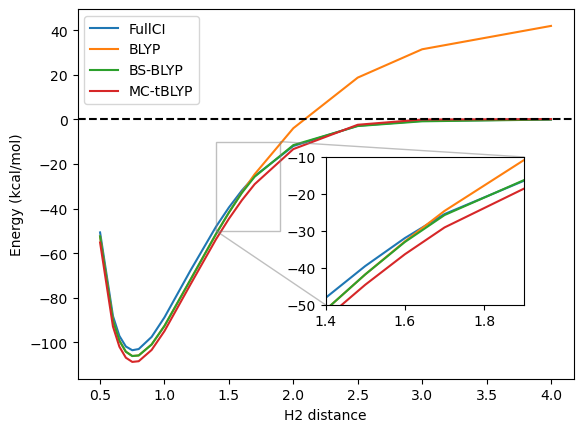

In [13]:
y5 = np.array(E_tblyp) * 627.5

fig, ax = plt.subplots()
ax.plot(x, y1, label="FullCI")
ax.plot(x, y3, label="BLYP")
ax.plot(x, y4, label="BS-BLYP")
ax.plot(x, y5, label="MC-tBLYP")
ax.axhline(y=0, color="k", linestyle="--")
ax.set_xlabel("H2 distance")
ax.set_ylabel("Energy (kcal/mol)")
ax.legend()

axin = ax.inset_axes([0.5, 0.2, 0.4, 0.4])
axin.set_xlim(1.4, 1.9)
axin.set_ylim(-50, -10)
axin.plot(x, y1, label="FullCI")
axin.plot(x, y3, label="BLYP")
axin.plot(x, y4, label="BS-BLYP")
axin.plot(x, y5, label="MC-tBLYP")
ax.indicate_inset_zoom(axin)

plt.show()

The MC-tBLYP result is very similar to the BLYP result at equilibrium distance but has the correct dissociation limit and a gentler curve in the intermediate region, which is where it differs most from the BS-BLYP result.

Of course, there is no specific reasons to use MCSCF densities. These densities have only correlation within the active space and are therefore not the true or best densities. We can instead try to optimize the wavefunction so that it minimizes the MC-PDFT energy expression. This variational MC-PDFT can be obtained in MultiPsi by simply setting the functional in the MCSCF driver. 

In [14]:
# Variational MC-tBLYP calculation of H.
mol_str = """
H 0.0000 0.0000 0.0000
"""

molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

scf_drv = vlx.ScfUnrestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)

space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
mcscf_drv = mtp.McscfDriver()
mcscf_drv.xcfun = "tBLYP"
mcscf_results = mcscf_drv.compute(molecule, basis, space)
E_H_tBLYP = mcscf_drv.get_energy()

# Variational MC-tBLYP calculation of H2 dissociation

mol_template = """
H 0.0000 0.0000 -H2dist
H 0.0000 0.0000  H2dist
"""
mol_str = mol_template.replace("H2dist", str(0.5))
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

scf_drv = vlx.ScfRestrictedDriver()
scf_results = scf_drv.compute(molecule, basis)

space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
space.cas(2, 2)

mcscf_drv = mtp.McscfDriver()
mcscf_drv.xcfun = "tBLYP"
mcscf_results = mcscf_drv.compute(molecule, basis, space)

E_tblyp = []

# Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("H2dist", str(dist / 2))
    print(mol_str)
    molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
    basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

    mcscf_results = mcscf_drv.compute(molecule, basis, space)
    E_tblyp.append(mcscf_drv.get_energy() - 2 * E_H_tBLYP)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          
        ╭────────────────────────────────────╮
        │          Driver settings           │
        ╰────────────────────────────────────╯
          State-specific calculation
          Max. iterations         : 50
          BFGS window             : 5
          Convergence thresholds:
            - Energy change       : 1e-08
            - Gradient norm       : 0.0001
                                                                                                                          
          Integrals in memory
                                                                                                                          

          Active space def

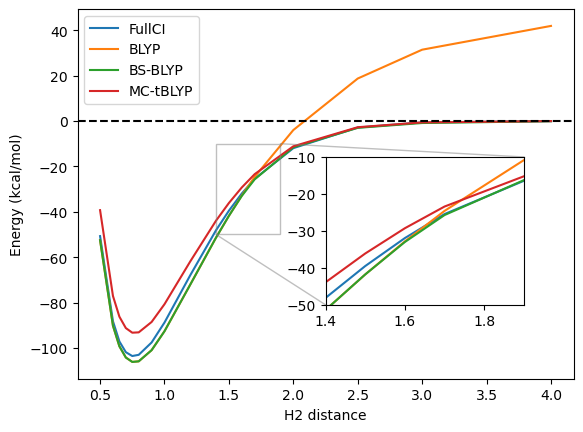

In [15]:
y5 = np.array(E_tblyp) * 627.5

fig, ax = plt.subplots()
ax.plot(x, y1, label="FullCI")
ax.plot(x, y3, label="BLYP")
ax.plot(x, y4, label="BS-BLYP")
ax.plot(x, y5, label="MC-tBLYP")
ax.axhline(y=0, color="k", linestyle="--")
ax.set_xlabel("H2 distance")
ax.set_ylabel("Energy (kcal/mol)")
ax.legend()

axin = ax.inset_axes([0.5, 0.2, 0.4, 0.4])
axin.set_xlim(1.4, 1.9)
axin.set_ylim(-50, -10)
axin.plot(x, y1, label="FullCI")
axin.plot(x, y3, label="BLYP")
axin.plot(x, y4, label="BS-BLYP")
axin.plot(x, y5, label="MC-tBLYP")
ax.indicate_inset_zoom(axin)

plt.show()